In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from utils import (
    create_sine_wave,
    quantize_signal,
    simulate_network_latency,
    simulate_packet_loss,
    encode_signal,
    decode_signal,
    plot_signal_subplot,
)

In [2]:
# 1.a. Création d'un signal de référence
frequency = 2000  # 2kHz
duration = 3  # 3 seconds
sample_rate = frequency * 10  # 10 échantillons par période
t, signal = create_sine_wave(frequency, duration, sample_rate)

# Play the sine wave
sd.play(signal, sample_rate)
sd.wait()

In [3]:
# 1.b+c Quantifier ce signal en utilisant différentes résolutions
quantized_signal_8bit = np.round(signal * 127).astype(np.int8)
quantized_signal_6bit = quantize_signal(signal, 6)
quantized_signal_4bit = quantize_signal(signal, 4)
quantized_signal_3bit = quantize_signal(signal, 3)
quantized_signal_2bit = quantize_signal(signal, 2)
quantized_signal_1bit = quantize_signal(signal, 1)

1.d. Que se passe-t-il quand la résolution du quantificateur devient 1 bit/éch ?

Quand la résolution du quantificateur devient 1 bit/éch, le signal de sortie est une onde carrée. La fréquence de l'onde carrée est égale à la fréquence du signal d'entrée. La forme d'onde carrée est obtenue en comparant le signal d'entrée avec une onde sinusoïdale de fréquence égale à celle du signal d'entrée.

In [4]:
# 2. Simuler la latence d'un réseau fonctionnant en mode paquet
# Le sens de l'ouïe humaine est effectivement sensible à la latence.
# Des retards de transmission peuvent provoquer des échos ou des interruptions perceptibles dans le son.
# Des latences supérieures à 20-30 ms peuvent être perceptibles et gênantes pour l'utilisateur.

latencies = [0, 1, 2, 3, 4]  # Différentes latences pour chaque paquet
packet_size = 2  # 2 échantillons par paquet
delayed_signal = simulate_network_latency(quantized_signal_8bit, packet_size, latencies)

In [5]:
# 3. Simulation de la perte de paquets :
# La perte de paquets peut être simulée en omettant certains paquets de la transmission.
# Cela peut entraîner des interruptions dans le signal audio. Avec une probabilité de perte de paquet de ( p = 10^{-3} ),
# la perte sera rare, mais avec ( p = 10^{-2} ), la perte sera plus fréquente et plus perceptible.
# Les conclusions peuvent inclure l'impact sur la qualité audio et la robustesse du système de codage face à la perte de paquets.
loss_probability_1 = 10**-3
loss_probability_2 = 10**-2
lost_signal_1 = simulate_packet_loss(quantized_signal_8bit, packet_size, loss_probability_1)
lost_signal_2 = simulate_packet_loss(quantized_signal_8bit, packet_size, loss_probability_2)

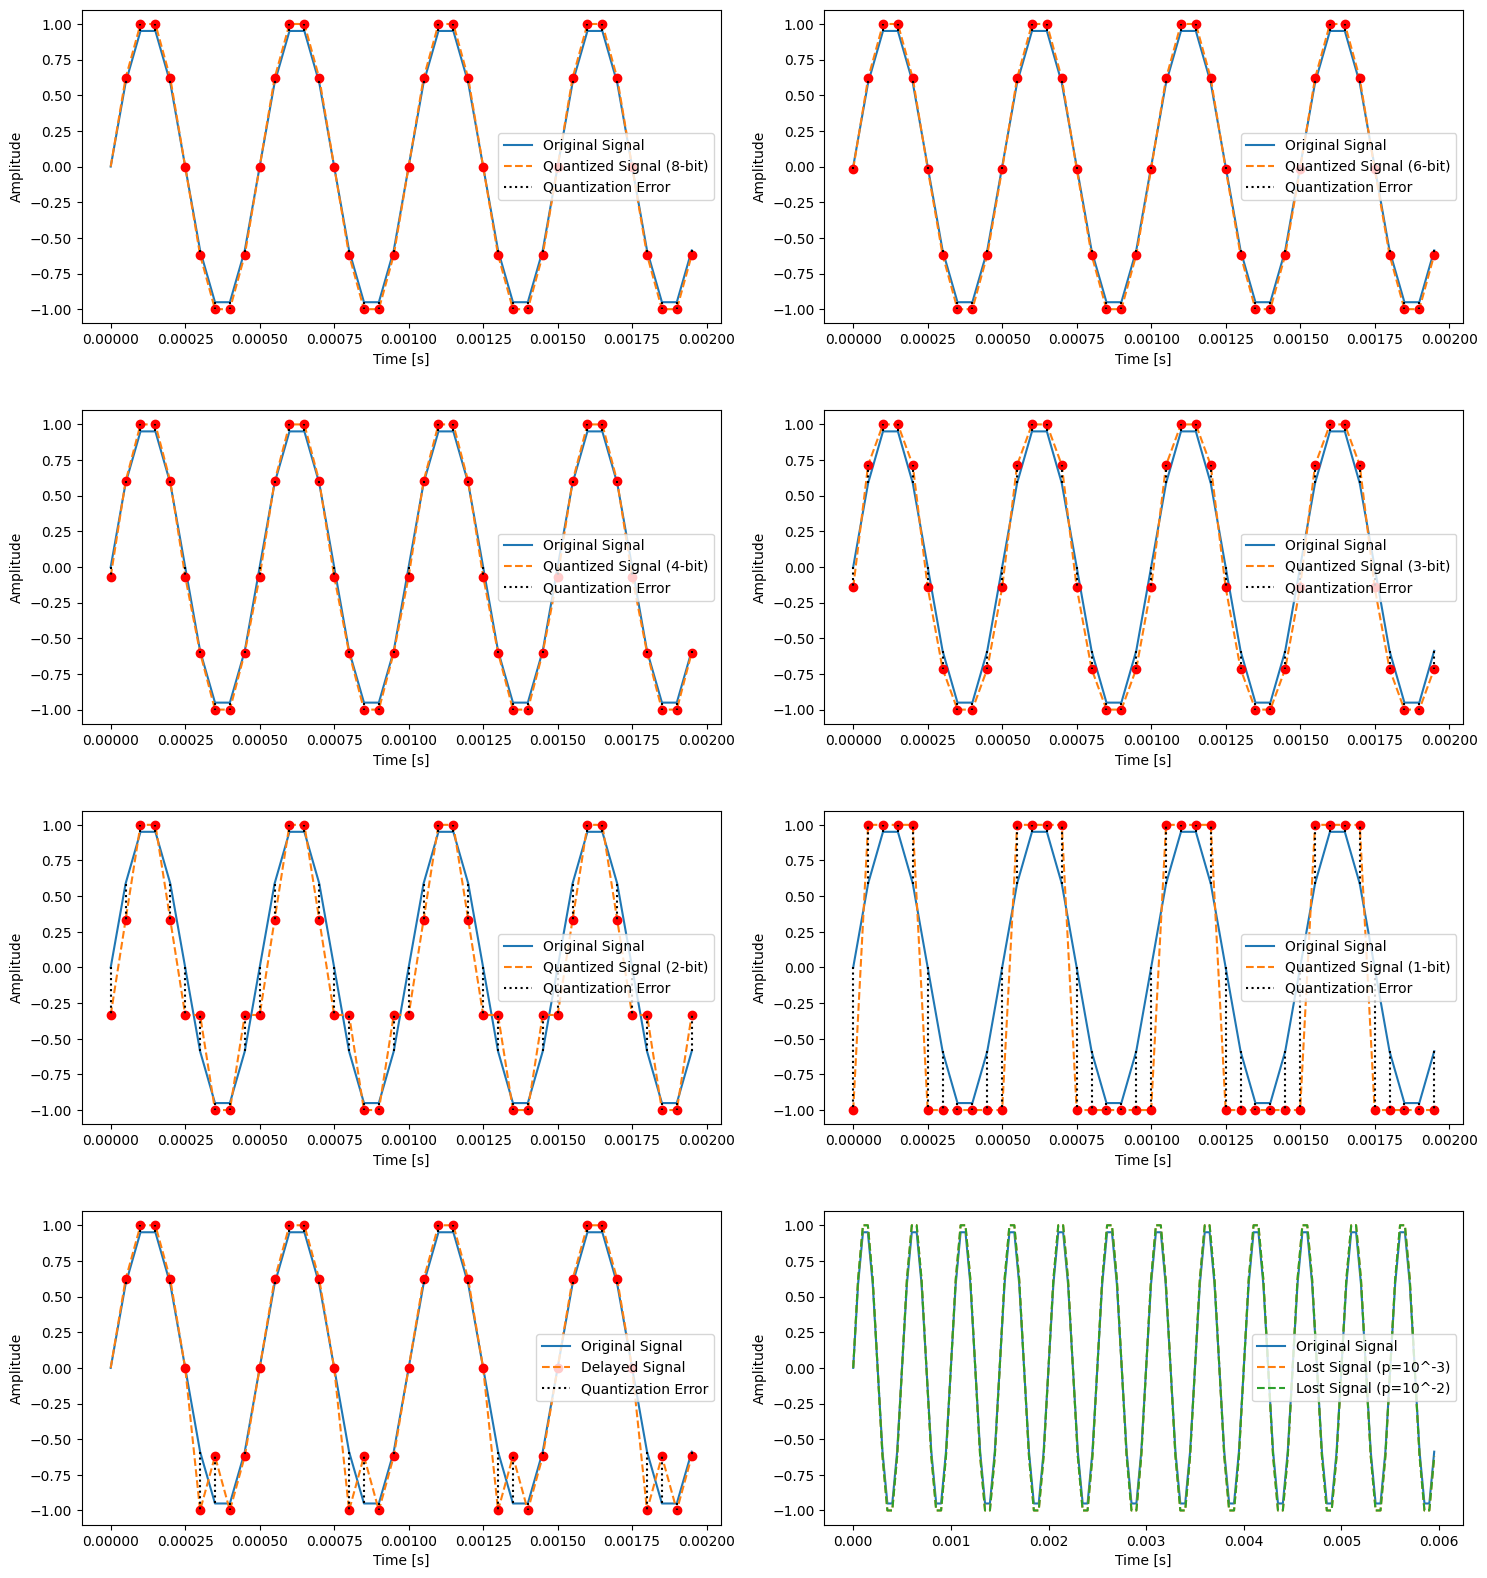

In [6]:

# Overlay Plots and Error Plots
slice_length = 40
t_slice = t[:slice_length]

plt.figure(figsize=(15, 18))

# Overlay plots
plot_signal_subplot(1, t_slice, signal[:slice_length], quantized_signal_8bit[:slice_length], 'Quantized Signal (8-bit)')
plot_signal_subplot(2, t_slice, signal[:slice_length], quantized_signal_6bit[:slice_length], 'Quantized Signal (6-bit)')
plot_signal_subplot(3, t_slice, signal[:slice_length], quantized_signal_4bit[:slice_length], 'Quantized Signal (4-bit)')
plot_signal_subplot(4, t_slice, signal[:slice_length], quantized_signal_3bit[:slice_length], 'Quantized Signal (3-bit)')
plot_signal_subplot(5, t_slice, signal[:slice_length], quantized_signal_2bit[:slice_length], 'Quantized Signal (2-bit)')
plot_signal_subplot(6, t_slice, signal[:slice_length], quantized_signal_1bit[:slice_length], 'Quantized Signal (1-bit)')

# Delayed signal
plot_signal_subplot(7, t_slice, signal[:slice_length], delayed_signal[:slice_length], 'Delayed Signal')

# Lost signal
slice_length = 3*slice_length
t_slice = t[:slice_length]
plt.subplot(4, 2, 8)
plt.plot(t_slice, signal[:slice_length], label='Original Signal')
plt.plot(t_slice, lost_signal_1[:slice_length]/np.max(lost_signal_1), label='Lost Signal (p=10^-3)', linestyle='--')
plt.plot(t_slice, lost_signal_2[:slice_length]/np.max(lost_signal_2), label='Lost Signal (p=10^-2)', linestyle='--')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout(h_pad=4)
plt.subplots_adjust(bottom=0.15)
plt.show()

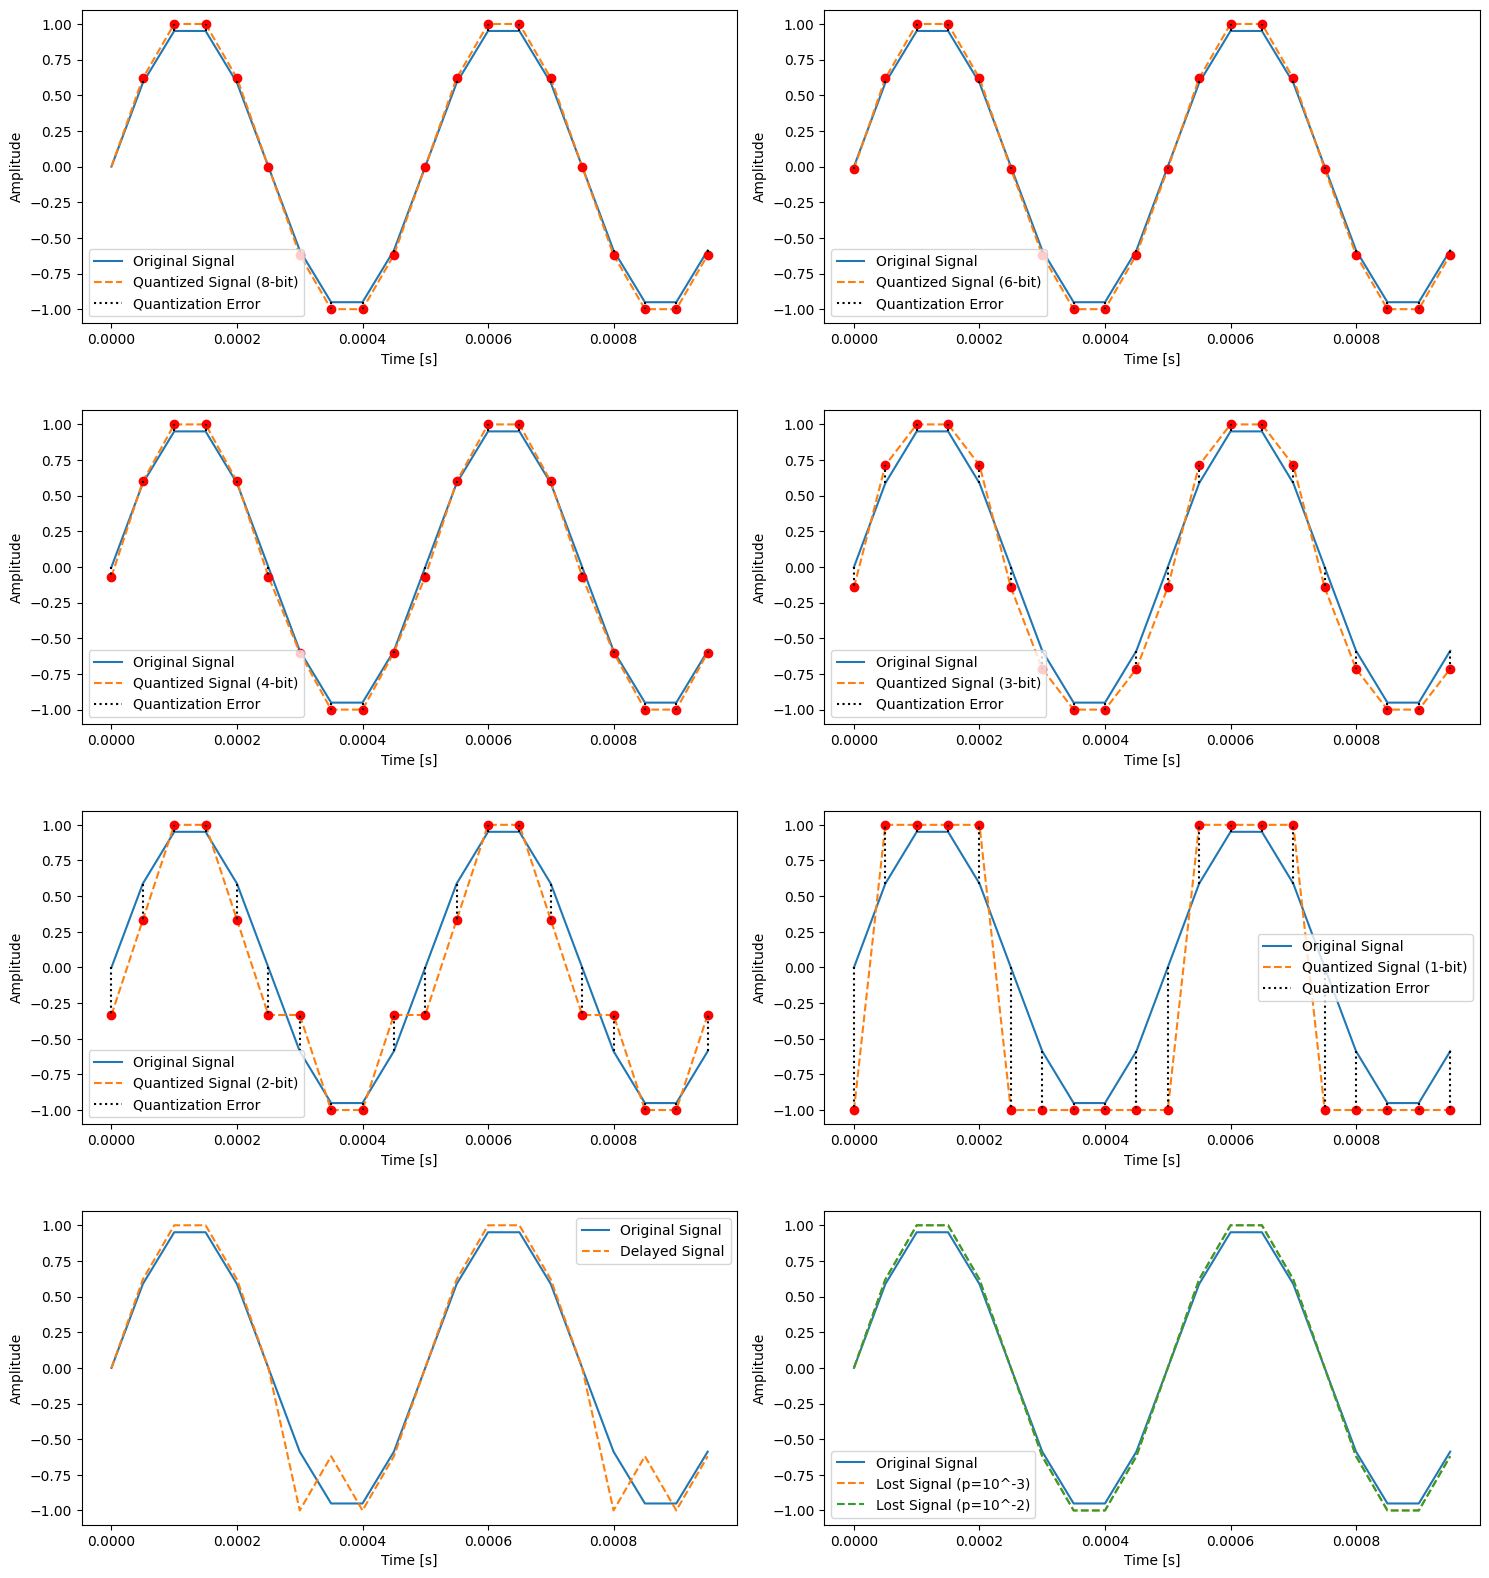

In [7]:
# Overlay Plots and Error Plots
slice_length = 20
t_slice = t[:slice_length]

plt.figure(figsize=(15, 18))

# Overlay plots
plot_signal_subplot(1, t_slice, signal[:slice_length], quantized_signal_8bit[:slice_length], 'Quantized Signal (8-bit)', norm=True)
plot_signal_subplot(2, t_slice, signal[:slice_length], quantized_signal_6bit[:slice_length], 'Quantized Signal (6-bit)', norm=True)
plot_signal_subplot(3, t_slice, signal[:slice_length], quantized_signal_4bit[:slice_length], 'Quantized Signal (4-bit)', norm=True)
plot_signal_subplot(4, t_slice, signal[:slice_length], quantized_signal_3bit[:slice_length], 'Quantized Signal (3-bit)', norm=True)
plot_signal_subplot(5, t_slice, signal[:slice_length], quantized_signal_2bit[:slice_length], 'Quantized Signal (2-bit)', norm=True)
plot_signal_subplot(6, t_slice, signal[:slice_length], quantized_signal_1bit[:slice_length], 'Quantized Signal (1-bit)', norm=True)

# Delayed signal
plt.subplot(4, 2, 7)
plt.plot(t_slice, signal[:slice_length], label='Original Signal')
plt.plot(t_slice, delayed_signal[:slice_length]/np.max(delayed_signal), label='Delayed Signal', linestyle='--')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()

# Lost signal
plt.subplot(4, 2, 8)
plt.plot(t_slice, signal[:slice_length], label='Original Signal')
plt.plot(t_slice, lost_signal_1[:slice_length]/np.max(lost_signal_1), label='Lost Signal (p=10^-3)', linestyle='--')
plt.plot(t_slice, lost_signal_2[:slice_length]/np.max(lost_signal_2), label='Lost Signal (p=10^-2)', linestyle='--')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout(h_pad=4)
plt.subplots_adjust(bottom=0.15)
plt.show()

#### Partie 2: Simuler la latence d'un réseau fonctionnant en mode paquet

##### Sensibilité de l'ouïe humaine à la latence
Le sens de l'ouïe humaine est effectivement sensible à la latence. Des retards de transmission peuventprovoquer des échos ou des interruptions perceptibles dans le son. Des latences supérieures à 20-30 mspeuvent être perceptibles et gênantes pour l'utilisateur. Un codeur ne devrait jamais depasser 100 ms de latence pour éviter des interruptions perceptibles.

##### Conclusions sur l'impact des retards de transmission
Les retards de transmission peuvent entraîner des interruptions perceptibles dans le signal audio. Des latences variables peuvent provoquer des distorsions et des échos, affectant ainsi la qualité de l'expérience auditive.

<Figure size 1500x1800 with 0 Axes>

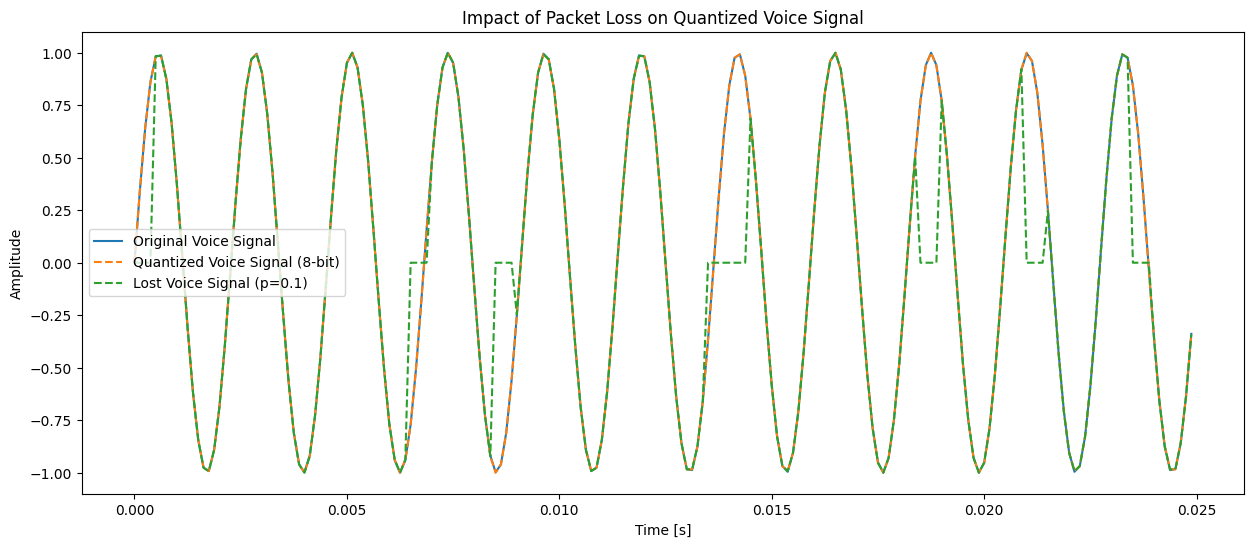

Taux de pertes de blocs de 4 octets: 10.0%


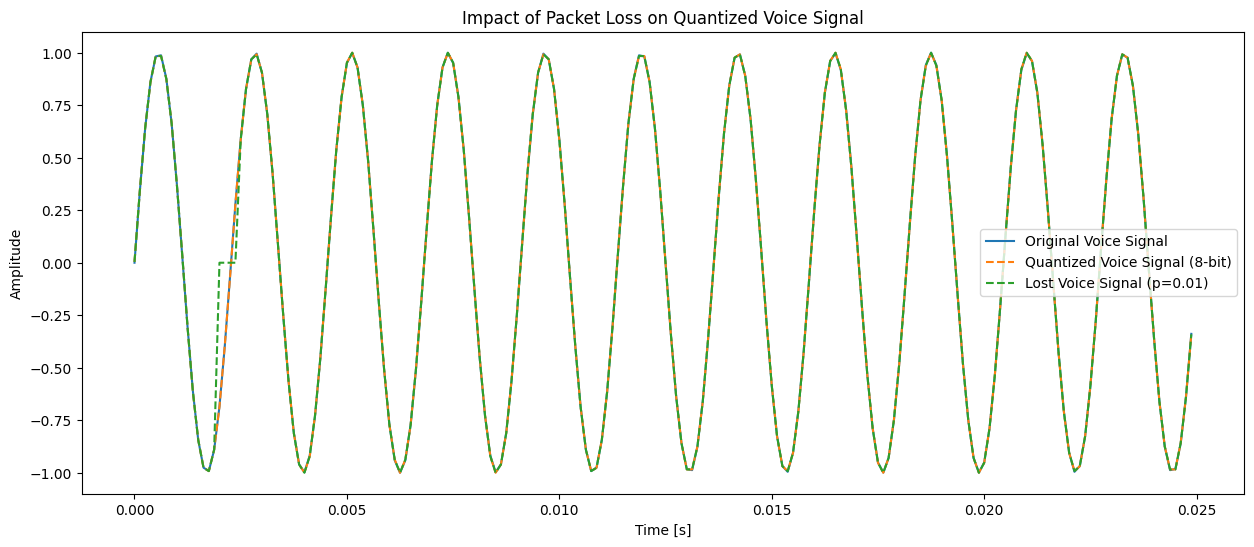

Taux de pertes de blocs de 4 octets: 1.0%


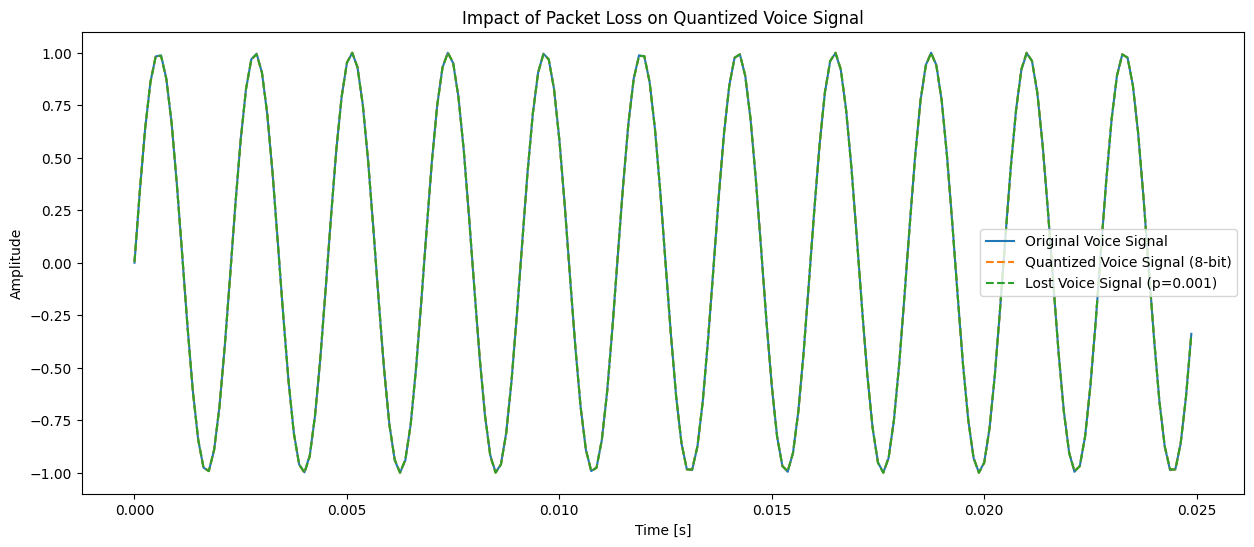

Taux de pertes de blocs de 4 octets: 0.1%


In [8]:
# 4. Quantifier la voix de Xtine en utilisant une résolution de 8 bits/éch, et créer des paquets de 4 octets.

# Générer un signal de voix simulé (par exemple, une onde sinusoïdale à 440 Hz)
voice_frequency = 440
voice_duration = 3
voice_sample_rate = 8000
t_voice, voice_signal = create_sine_wave(voice_frequency, voice_duration, voice_sample_rate)

slice_length = 200

# Quantifier le signal de voix en utilisant une résolution de 8 bits/éch
quantized_voice_signal = quantize_signal(voice_signal, 8)

# Encode DPCM
encoded_voice_signal = encode_signal(quantized_voice_signal, encoding_type='DPCM')

# Créer des paquets de 4 octets (32 bits)
packet_size_bytes = 4
packet_size_samples = packet_size_bytes * 8 // 8  # 4 octets = 4 échantillons de 8 bits

# Liste des probabilités de perte à tester
loss_probabilities = [0.1, 0.01, 0.001]

# Simuler la perte de paquets et décoder les signaux perdus
lost_voice_signals = []
decoded_lost_voice_signals = []

for loss_probability in loss_probabilities:
    lost_voice_signal = simulate_packet_loss(encoded_voice_signal, packet_size_samples, loss_probability)
    decoded_lost_voice_signal = decode_signal(lost_voice_signal, encoding_type='DPCM')
    lost_voice_signals.append(lost_voice_signal)
    decoded_lost_voice_signals.append(decoded_lost_voice_signal)

# Décodez le signal de voix
decoded_voice_signal = decode_signal(encoded_voice_signal, encoding_type='DPCM')

# Overlay Plots and Error Plots
t_voice_slice = t_voice[:slice_length]

plt.figure(figsize=(15, 18))

for i, loss_probability in enumerate(loss_probabilities):
    plt.figure(figsize=(15, 6))
    plt.plot(t_voice[:slice_length], voice_signal[:slice_length], label='Original Voice Signal')
    plt.plot(t_voice[:slice_length], quantized_voice_signal[:slice_length], label='Quantized Voice Signal (8-bit)', linestyle='--')
    plt.plot(t_voice[:slice_length], decoded_lost_voice_signals[i][:slice_length], label=f'Lost Voice Signal (p={loss_probability})', linestyle='--')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.title('Impact of Packet Loss on Quantized Voice Signal')
    plt.show()

    print(f'Taux de pertes de blocs de 4 octets: {loss_probability * 100}%')